In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
data = pd.read_csv("zbior.csv", encoding='cp1250', sep=';')
df = pd.DataFrame(data)

# Rozpoznawcza analiza danych

In [220]:
df.head()

,ID_N,KALKULACJA,KONWERSJA,DZIEN_PIERWSZEJ_OPERACJI,ILE_DNI_PRZED_POCZ_UBEZ,SKLADKA,LATA_PRAWA_JAZDY,WIEK_EGZAMINU,WIEK_KLIENTA,UZYTKOWANIE,KOD_POCZTOWY,MARKA,MODEL,POJEMNOSC,MOC,PALIWO,MOMENT_OBROTOWY,DMC,SEGMENT
0,1,1,0,Wtorek,7,583.9,50.0,17.0,68,PRIVATE,08-500,MERCEDES-BENZ,Klasa C ...,2167,98,Diesel,31500,2000,Wyższa średnia
1,2,1,0,Poniedziałek,2,644.3,13.0,29.0,42,PRIVATE,41-400,VOLKSWAGEN,Golf ...,1771,104,Benzyna,21000,1730,Niższa średnia
2,3,1,1,Środa,0,342.9,36.0,15.0,52,PRIVATE,97-700,VOLKSWAGEN,Passat ...,1379,84,Benzyna,20000,2000,Wyższa średnia
3,4,1,0,Poniedziałek,0,341.4,13.0,17.0,31,PRIVATE,38-900,AUDI,A4 ...,1900,86,Diesel,22500,1835,Wyższa średnia
4,5,1,0,Czwartek,0,460.5,36.0,26.0,63,PRIVATE,89-100,VOLKSWAGEN,Golf ...,1978,92,Benzyna,16600,1565,Niższa średnia


In [97]:
df.describe()

,ID_N,KALKULACJA,KONWERSJA,ILE_DNI_PRZED_POCZ_UBEZ,SKLADKA,LATA_PRAWA_JAZDY,WIEK_EGZAMINU,WIEK_KLIENTA,POJEMNOSC,MOC,MOMENT_OBROTOWY,DMC
count,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,4841.000000,4841.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1.0,0.144800,4.995800,683.371640,23.207808,20.838876,44.73600,1716.994200,76.945600,16985.024000,1604.193400
std,1443.520003,0.0,0.351934,7.185743,660.770402,11.978363,6.669877,12.97462,438.827325,29.615902,9832.057353,567.083833
min,1.000000,1.0,0.000000,0.000000,200.000000,0.000000,15.000000,18.00000,17.000000,-7.000000,0.000000,0.000000
25%,1250.750000,1.0,0.000000,0.000000,370.675000,15.000000,17.000000,34.00000,1406.000000,57.000000,11200.000000,1480.000000
50%,2500.500000,1.0,0.000000,2.000000,473.400000,21.000000,18.000000,43.00000,1752.000000,74.000000,15400.000000,1720.000000
75%,3750.250000,1.0,0.000000,8.000000,702.675000,32.000000,22.000000,54.00000,1944.250000,91.000000,23500.000000,1935.000000
max,5000.000000,1.0,1.000000,40.000000,13790.300000,71.000000,69.000000,88.00000,5287.000000,360.000000,62000.000000,2770.000000


KONWERSJA
0    4276
1     724
Name: count, dtype: int64
Procent zawarcia polis: 14.48%


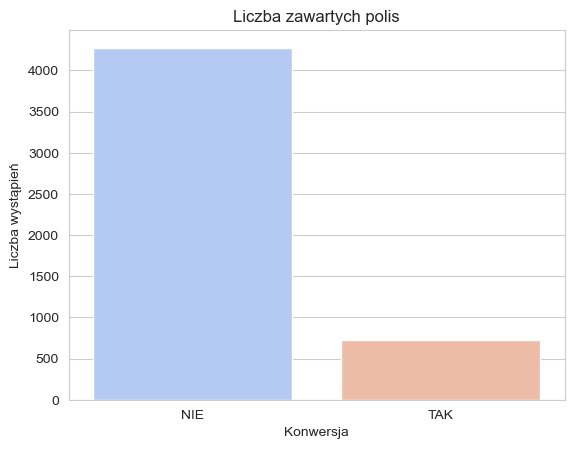

In [173]:
liczba_zawartych_polis = df['KONWERSJA'].sum()
procent_zawarcia = (liczba_zawartych_polis / len(df)) * 100

# Wyświetlenie podstawowych informacji
counts = df['KONWERSJA'].value_counts()
print(counts)
print(f"Procent zawarcia polis: {procent_zawarcia:.2f}%")

# Wykres zawartych polis
sns.set_style('whitegrid')
ax = sns.countplot(x='KONWERSJA', data=df, palette='coolwarm')
plt.xlabel('Konwersja')
plt.ylabel('Liczba wystąpień')
plt.title('Liczba zawartych polis')
plt.xticks([0, 1], ['NIE', 'TAK'])
# plt.savefig('plot1.jpg', format='jpg', dpi=300)
plt.show()

In [186]:
# Wybór tylko kolumn numerycznych
kolumny_numeryczne = df.select_dtypes(include=[np.number]).columns.tolist()

# Wyliczenie korelacji tylko dla kolumn numerycznych
korelacje = df[kolumny_numeryczne].corr()['KONWERSJA'].sort_values(ascending=False)
print(korelacje)

KONWERSJA                  1.000000
LATA_PRAWA_JAZDY           0.027687
ID_N                      -0.005804
WIEK_KLIENTA              -0.011297
DMC                       -0.042020
POJEMNOSC                 -0.042978
MOMENT_OBROTOWY           -0.044061
MOC                       -0.062234
ILE_DNI_PRZED_POCZ_UBEZ   -0.063041
WIEK_EGZAMINU             -0.071003
SKLADKA                   -0.176037
KALKULACJA                      NaN
Name: KONWERSJA, dtype: float64


In [188]:
# Tworzenie kategorii wiekowych
bins = [18, 30, 50, 70, 100]  # Przykładowe przedziały wiekowe
labels = ['Młody', 'Średni', 'Starszy', 'Bardzo Starszy']  # Etykiety dla kategorii
df['Kategoria_wieku'] = pd.cut(df['WIEK_KLIENTA'], bins=bins, labels=labels)

# Obliczenie średniej konwersji dla każdej grupy wiekowej
srednie_konwersja_wiek = df.groupby('Kategoria_wieku')['KONWERSJA'].mean()
print(srednie_konwersja_wiek)

Kategoria_wieku
Młody             0.085881
Średni            0.163855
Starszy           0.145903
Bardzo Starszy    0.064286
Name: KONWERSJA, dtype: float64


<Axes: >

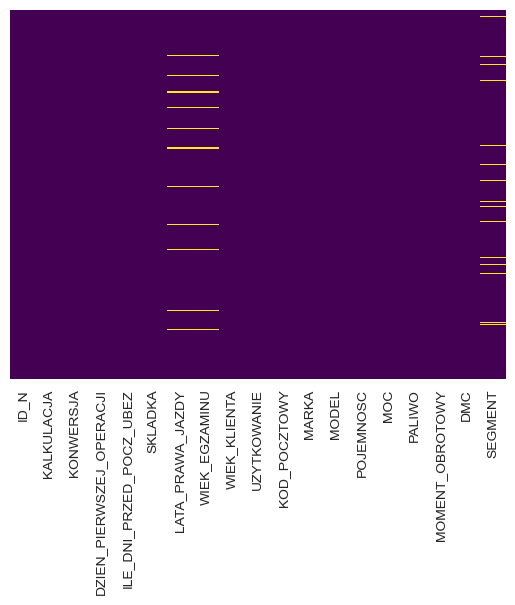

In [100]:
# Mapa braków danych
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

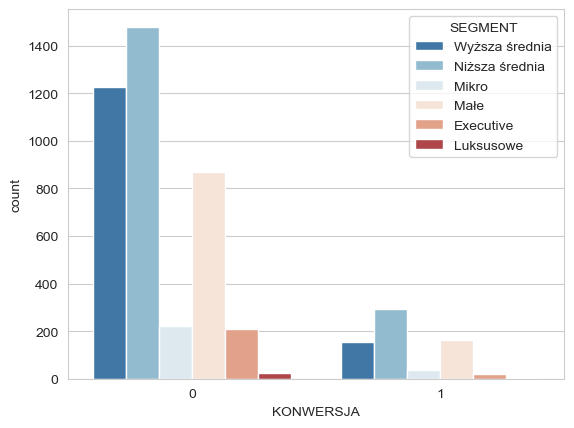

In [101]:
# Wykres konwersji w zalezności od segmentu
ax = sns.countplot(x='KONWERSJA', hue='SEGMENT', data=df, palette='RdBu_r')

In [151]:
# Wskaźnik sukcesu konwersji w zależności od segmentu
conversion_percentages = df.groupby('SEGMENT')['KONWERSJA'].mean() * 100
conversion_percentages = conversion_percentages.round(2).map('{:.2f}%'.format)

print(conversion_percentages)

SEGMENT
Executive          8.66%
Luksusowe         16.67%
Małe              15.73%
Mikro             14.01%
Niższa średnia    16.48%
Wyższa średnia    11.22%
Name: KONWERSJA, dtype: object


<Axes: ylabel='Frequency'>

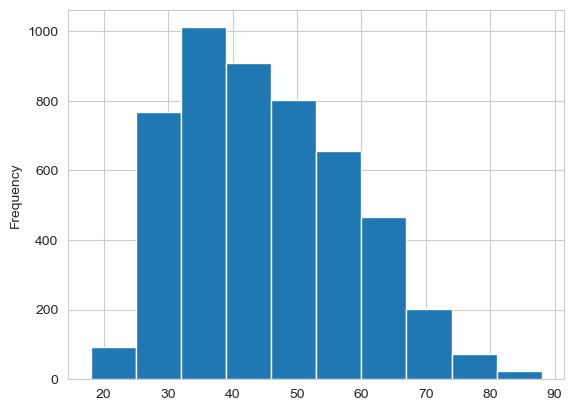

In [102]:
# Histogram wieku
df['WIEK_KLIENTA'].plot.hist()

<Axes: xlabel='KONWERSJA', ylabel='count'>

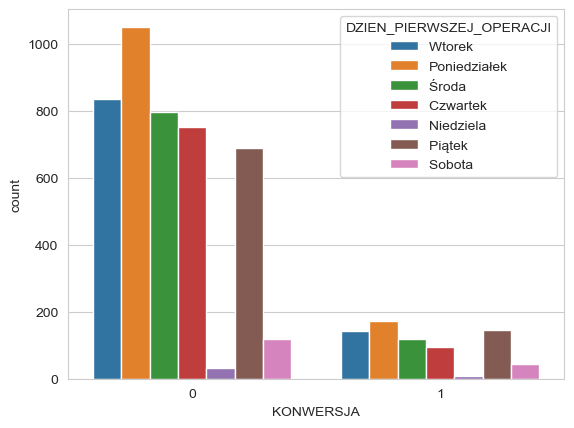

In [225]:
# Liczba konwersji w zależności od dnia tygodnia
sns.countplot(x='KONWERSJA', hue='DZIEN_PIERWSZEJ_OPERACJI',data=df)

In [152]:
# Wskaźnik sukcesu konwersji w zależności od dnia tygodnia
conversion_percentages = df.groupby('DZIEN_PIERWSZEJ_OPERACJI')['KONWERSJA'].mean() * 100
conversion_percentages = conversion_percentages.round(2).map('{:.2f}%'.format)
print(conversion_percentages)

DZIEN_PIERWSZEJ_OPERACJI
Czwartek        11.31%
Niedziela       18.42%
Piątek          17.37%
Poniedziałek    13.99%
Sobota          27.27%
Wtorek          14.52%
Środa           12.92%
Name: KONWERSJA, dtype: object


<Axes: >

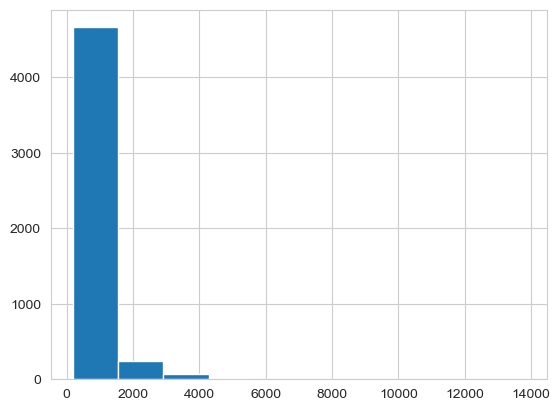

In [279]:
train['SKLADKA'].hist()

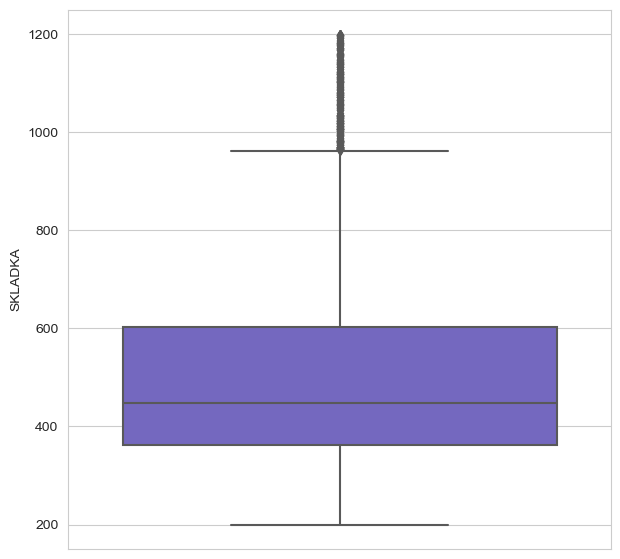

In [206]:
# Boxplot dla składki ograniczony

# Kwantyle
Q1 = df['SKLADKA'].quantile(0.25)
Q3 = df['SKLADKA'].quantile(0.75)
IQR = Q3 - Q1

# Ograniczenia wartości odstających
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['SKLADKA'] > lower_bound) & (df['SKLADKA'] < upper_bound)]

plt.figure(figsize=(7, 7))
sns.boxplot(y='SKLADKA', data=df_no_outliers, color='#6a5acd')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14288\2987567930.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




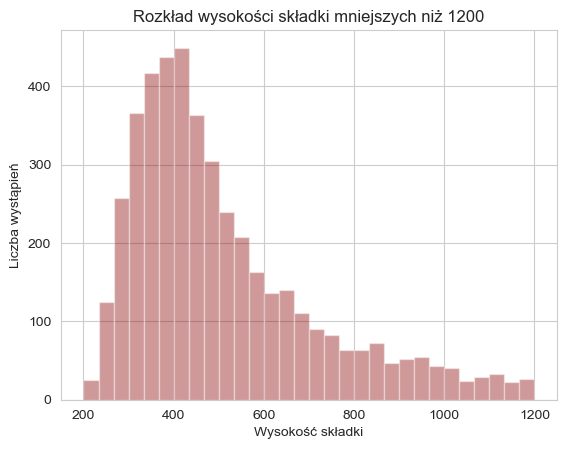

In [280]:
# Rozkład wielkości składki ograniczonej
skladka_ograniczona = df[df['SKLADKA'] < 1200]

sns.distplot(skladka_ograniczona['SKLADKA'].dropna(), kde=False, color='darkred', bins=30)
plt.xlabel('Wysokość składki')
plt.ylabel('Liczba wystąpień')
plt.title('Rozkład wysokości składki mniejszych niż 1200')
# plt.savefig('plot2.jpg', format='jpg', dpi=300)
plt.show()

In [223]:
ograniczenie = 1200
skladka_ograniczona = df[df['SKLADKA'] <= ograniczenie]

# Korelacja dla składki z ograniczeniem
korelacja_skladka_konwersja = skladka_ograniczona['SKLADKA'].corr(skladka_ograniczona['KONWERSJA'])
print(f"Korelacja między SKLADKA a KONWERSJA dla składek mniejszych niż {ograniczenie}: {korelacja_skladka_konwersja}")

Korelacja między SKLADKA a KONWERSJA dla składek mniejszych niż 1200: -0.25235854270156255


In [276]:
df['REGION'] = df['KOD_POCZTOWY'].str.split('-').str[0]
region_counts = df['REGION'].value_counts().reset_index()
conversion_percentages = (df.groupby('REGION')['KONWERSJA'].mean() * 100).round(2).reset_index()
conversion_percentages['CONVERSION_PERCENTAGES'] = conversion_percentages['KONWERSJA'].apply(lambda x: f'{x:.2f}%')

result_df = pd.merge(region_counts, conversion_percentages[['REGION', 'CONVERSION_PERCENTAGES']], on='REGION', how='left')
result_df.columns = ['REGION', 'COUNT', 'CONVERSION_PERCENTAGES']
result_df = result_df[result_df['COUNT'] >= 100]  # Filtrowanie wartości COUNT >= 100
print(result_df)

   REGION  COUNT CONVERSION_PERCENTAGES
0      32    275                 18.55%
1      62    232                 16.81%
2      26    182                 20.33%
3      21    179                 17.32%
4      42    178                 12.92%
5      37    144                 21.53%
6      34    142                 26.76%
7      05    134                  9.70%
8      38    133                 10.53%
9      22    131                 23.66%
10     64    116                 20.69%
11     43    116                 12.93%
12     97    115                 15.65%
13     63    111                 18.02%


In [270]:
# Liczebności marki
region_counts = df['MARKA'].value_counts().reset_index()
conversion_percentages = df.groupby('MARKA')['KONWERSJA'].mean() * 100
conversion_percentages = conversion_percentages.round(2).sort_values(ascending=False).reset_index()
conversion_percentages['CONVERSION_PERCENTAGES'] = conversion_percentages['KONWERSJA'].apply(lambda x: f'{x:.2f}%')

result_df = pd.merge(region_counts, conversion_percentages[['MARKA', 'CONVERSION_PERCENTAGES']], on='MARKA', how='left')
result_df.columns = ['MARKA', 'COUNT', 'CONVERSION_PERCENTAGES']
print(result_df.head(10))

        MARKA  COUNT CONVERSION_PERCENTAGES
0  VOLKSWAGEN    771                 16.73%
1        OPEL    662                 16.62%
2        FORD    383                 10.97%
3        AUDI    381                 15.22%
4     RENAULT    369                 16.80%
5        FIAT    307                 16.61%
6     PEUGEOT    221                 14.03%
7       SKODA    196                 15.31%
8         BMW    188                  9.57%
9      TOYOTA    187                  9.09%


In [146]:
# Liczebności w zależności od typu paliwa
df['PALIWO'].value_counts().head(10)

PALIWO
Benzyna        2914
Diesel         2081
Benzyna/gaz       4
Elektryczny       1
Name: count, dtype: int64

# Czyszczenie danych dla modelu regresji logistycznej

In [229]:
train = pd.read_csv('zbior.csv', encoding='cp1250', sep=';')

## Wypełnianie braków danych

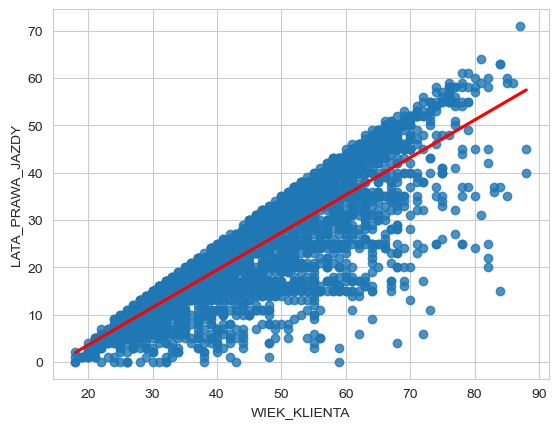

In [230]:
# Wykres zależności pomiędzy wiekiem klienta a latami prawa jazdy
sns.regplot(x= "WIEK_KLIENTA", y="LATA_PRAWA_JAZDY", data=train, ci=None, line_kws= dict(color = "red"))
plt.show()

In [231]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Dzielenie danych
train_with_data = train.dropna(subset=['LATA_PRAWA_JAZDY'])
train_missing = train[train['LATA_PRAWA_JAZDY'].isnull()]

# Utworzenie zbiorów treningowych i testowych
X_train = train_with_data['WIEK_KLIENTA'].values.reshape(-1, 1)
y_train = train_with_data['LATA_PRAWA_JAZDY'].values.reshape(-1, 1)
X_test = train_missing['WIEK_KLIENTA'].values.reshape(-1, 1)

# Inicjalizacja i trenowanie modelu
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie brakujących wartości
predicted_values = model.predict(X_test)

# Wypełnienie brakujących wartości w oryginalnym zbiorze danych
train.loc[train['LATA_PRAWA_JAZDY'].isnull(), 'LATA_PRAWA_JAZDY'] = np.squeeze(predicted_values)

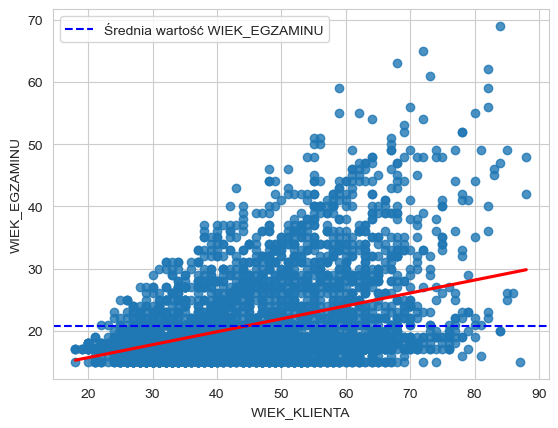

In [232]:
# Wykres zależności pomiędzy wiekiem klienta a wiekiem egzaminu
srednia_wiek_egzaminu = train['WIEK_EGZAMINU'].mean()

# Wykres regresji
sns.regplot(x="WIEK_KLIENTA", y="WIEK_EGZAMINU", data=train, ci=None, line_kws=dict(color="red"))

# Dodanie linii oznaczającej średnią wartość 'WIEK_EGZAMINU'
plt.axhline(y=srednia_wiek_egzaminu, color='blue', linestyle='--', label='Średnia wartość WIEK_EGZAMINU')
plt.legend()
plt.show()

In [233]:
# Mała zalezność dlatego wypełniam brakująze wartości średnią wartością
# Wyliczenie średniej wartości kolumny 'WIEK_EGZAMINU'
srednia_wiek_egzaminu = train['WIEK_EGZAMINU'].mean()

# Uzupełnienie braków danych średnią wartością
train['WIEK_EGZAMINU'].fillna(srednia_wiek_egzaminu, inplace=True)

In [234]:
train['SEGMENT'].unique()

array(['Wyższa średnia', 'Niższa średnia', 'Mikro', 'Małe', 'Executive',
       nan, 'Luksusowe'], dtype=object)

In [235]:
# Liczba braków w kolumnie SEGMENT
liczba_brakow = train['SEGMENT'].isnull().sum()
print(liczba_brakow)

298


In [236]:
# Zmiana wartości kolumny SEGMENT z sześciu na dwie i wypełnienie braków tą większą
mapping = {
    'Niższa średnia': 'Niższa',
    'Mikro': 'Niższa',
    'Małe': 'Niższa',
    'Wyższa średnia': 'Wyższa',
    'Executive': 'Wyższa',
    'Luksusowe': 'Wyższa'
}

train['SEGMENT'] = train['SEGMENT'].replace(mapping).fillna('Niższa')

<Axes: >

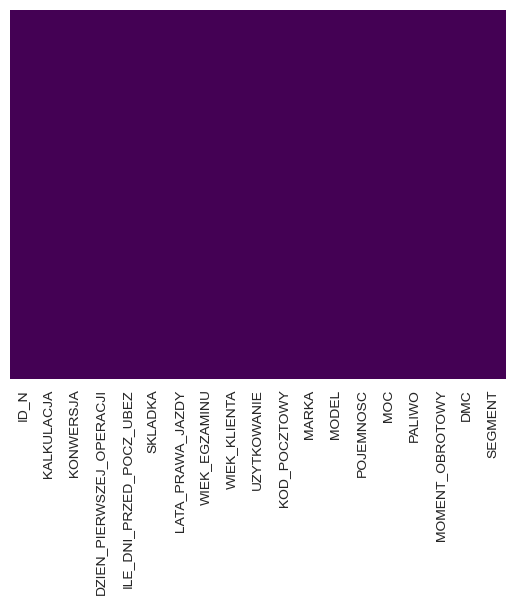

In [237]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_N                      5000 non-null   int64  
 1   KALKULACJA                5000 non-null   int64  
 2   KONWERSJA                 5000 non-null   int64  
 3   DZIEN_PIERWSZEJ_OPERACJI  5000 non-null   object 
 4   ILE_DNI_PRZED_POCZ_UBEZ   5000 non-null   int64  
 5   SKLADKA                   5000 non-null   float64
 6   LATA_PRAWA_JAZDY          5000 non-null   float64
 7   WIEK_EGZAMINU             5000 non-null   float64
 8   WIEK_KLIENTA              5000 non-null   int64  
 9   UZYTKOWANIE               5000 non-null   object 
 10  KOD_POCZTOWY              5000 non-null   object 
 11  MARKA                     5000 non-null   object 
 12  MODEL                     5000 non-null   object 
 13  POJEMNOSC                 5000 non-null   int64  
 14  MOC     

In [239]:
# Zrzucenie kolumn nieumerycznych
train.drop(['DZIEN_PIERWSZEJ_OPERACJI', 'UZYTKOWANIE', 'KOD_POCZTOWY', 'MARKA', 'MODEL', 'PALIWO'],axis=1,inplace=True)

In [240]:
# Koduje kolumnę SEGMENT na zmienne wskaźnikowe
segment = pd.get_dummies(train['SEGMENT'],drop_first=True)
segment = segment.astype(int)

In [241]:
train = pd.concat([train,segment],axis=1)

In [242]:
train.drop(['SEGMENT'],axis=1,inplace=True)

In [243]:
train.head()

,ID_N,KALKULACJA,KONWERSJA,ILE_DNI_PRZED_POCZ_UBEZ,SKLADKA,LATA_PRAWA_JAZDY,WIEK_EGZAMINU,WIEK_KLIENTA,POJEMNOSC,MOC,MOMENT_OBROTOWY,DMC,Wyższa
0,1,1,0,7,583.9,50.0,17.0,68,2167,98,31500,2000,1
1,2,1,0,2,644.3,13.0,29.0,42,1771,104,21000,1730,0
2,3,1,1,0,342.9,36.0,15.0,52,1379,84,20000,2000,1
3,4,1,0,0,341.4,13.0,17.0,31,1900,86,22500,1835,1
4,5,1,0,0,460.5,36.0,26.0,63,1978,92,16600,1565,0


# Budowanie modelu regresji logistycznej

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = train.drop('KONWERSJA', axis=1)
y = train['KONWERSJA']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [69]:
predictions = logmodel.predict(X_test)

## Ocena modelu

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
# Sprawdzenie dokładności modelu
accuracy = accuracy_score(y_test, predictions)
print(f"Dokładność modelu: {accuracy:.2f}")

# Wyświetlenie raportu klasyfikacji oraz macierzy pomyłek
print("\nRaport klasyfikacji:")
print(classification_report(y_test, predictions))

print("\nMacierz pomyłek:")
print(confusion_matrix(y_test, predictions))

Dokładność modelu: 0.85

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1282
           1       0.00      0.00      0.00       218

    accuracy                           0.85      1500
   macro avg       0.43      0.50      0.46      1500
weighted avg       0.73      0.85      0.79      1500


Macierz pomyłek:
[[1282    0]
 [ 218    0]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

